In [55]:
import TwoMapper
import Surfaces
import numpy as np

import kmapper as km
from kmapper import jupyter
from kmapper import nerve
from kmapper.plotlyviz import plotlyviz

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import matplotlib.pyplot as plt

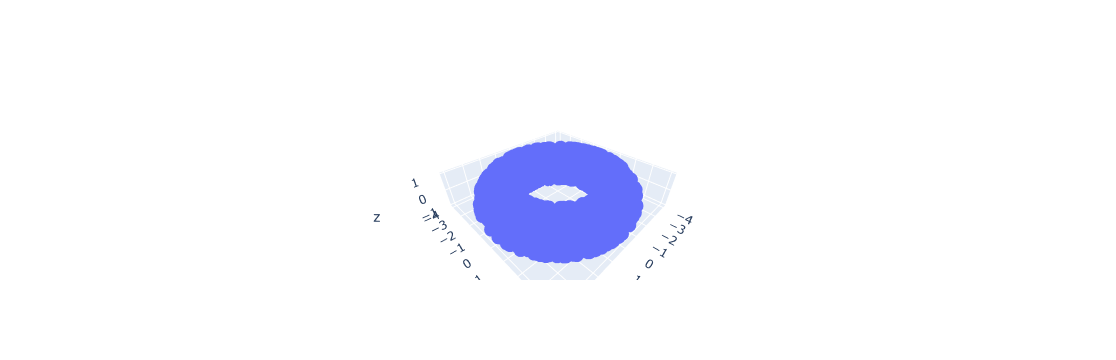

In [56]:
'change Surfaces file to output data as an array'
data = np.array(Surfaces.sample_torus(1000))
torus_graph = Surfaces.graph_sample(data)

In [57]:
# Initialize
mapper = km.KeplerMapper(verbose=0)

# Fit to and transform the data
lens = mapper.fit_transform(data, projection=[0,1])

# Create dictionary called 'simplicial_complex' with nodes, edges and meta-information
simplicial_complex = mapper.map(lens, X=data,
                                cover=km.Cover(n_cubes=8, perc_overlap=0.4),
                                nerve=nerve.GraphNerve(min_intersection=1))

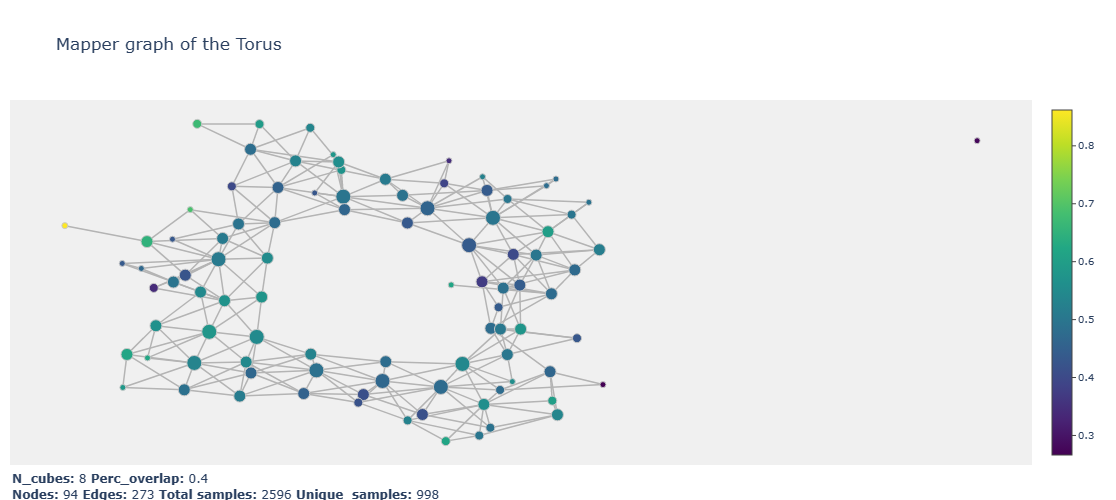

In [61]:
onedim = plotlyviz(simplicial_complex, title='Mapper graph of the Torus')
onedim.show()

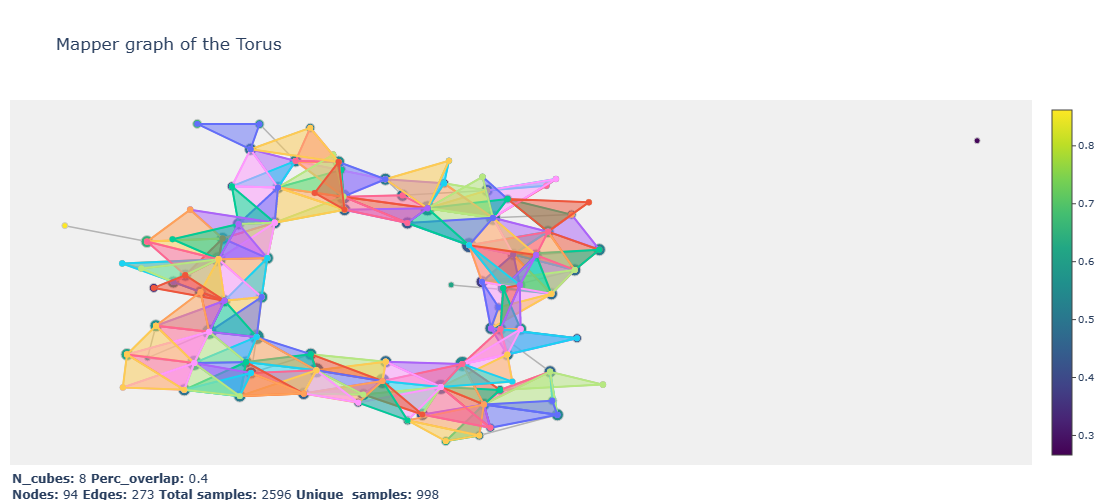

In [62]:
twodim = TwoMapper.graph_2Mapper(onedim,simplicial_complex)
twodim.show()

In [ ]:
gains = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5]
resolutions = [5,10,15,20,25,30]

for p in gains:
    for n in resolutions:
        simp_complex = mapper.map(lens, X=data, cover=km.Cover(n_cubes=n, perc_overlap=p), nerve = nerve.GraphNerve(min_intersection=1))
        graph = plotlyviz(simp_complex, title=f'Mapper Graph with resolution {n} and gain {p}')
        graph.show()   

In [ ]:
lens2 = mapper.fit_transform(data, projection = [0,1])

for p in gains:
    for n in resolutions:
        simp_complex = mapper.map(lens2, X=data, cover=km.Cover(n_cubes=n, perc_overlap=p), nerve = nerve.GraphNerve(min_intersection=1))
        graph = plotlyviz(simp_complex, title=f'Mapper Graph with resolution {n} and gain {p}')
        graph.show() 

In [ ]:
lens3 = mapper.fit_transform(data, projection = [0,2])

for p in gains:
    for n in resolutions:
        simp_complex = mapper.map(lens, X=data, cover=km.Cover(n_cubes=n, perc_overlap=p), nerve = nerve.GraphNerve(min_intersection=1))
        graph = plotlyviz(simp_complex, title=f'Mapper Graph with resolution {n} and gain {p}')
        graph.show() 

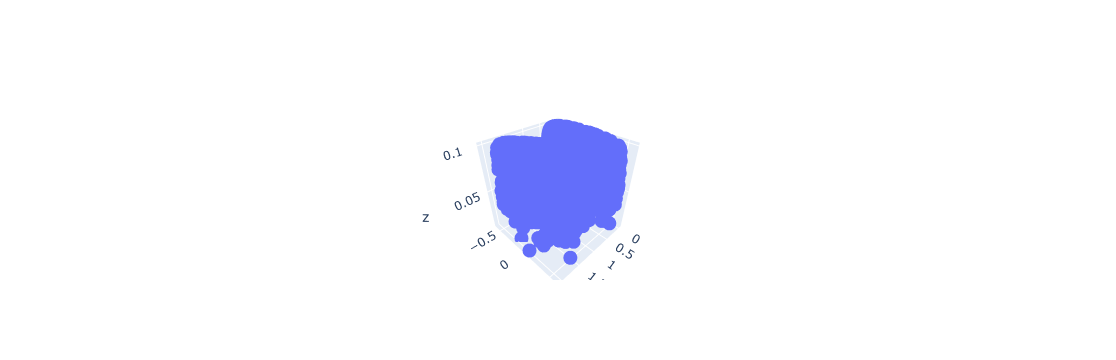

In [67]:
sample_2torus = np.array(Surfaces.sample_g2torus(2000))
graph2 = Surfaces.graph_sample(sample_2torus)

In [77]:
lens2 = mapper.fit_transform(sample_2torus, projection=[0,1])
simplicial_complex2 = mapper.map(lens2, X=sample_2torus,
                                cover=km.Cover(n_cubes=10, perc_overlap=0.35),
                                nerve=nerve.GraphNerve(min_intersection=1))

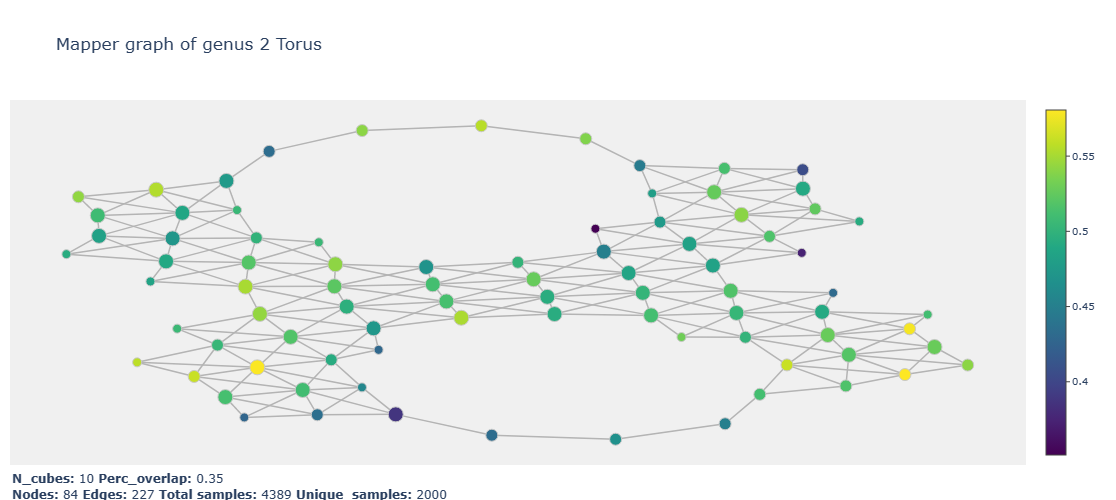

In [78]:
g_onedim = plotlyviz(simplicial_complex2, title = 'Mapper graph of genus 2 Torus')
g_onedim.show()

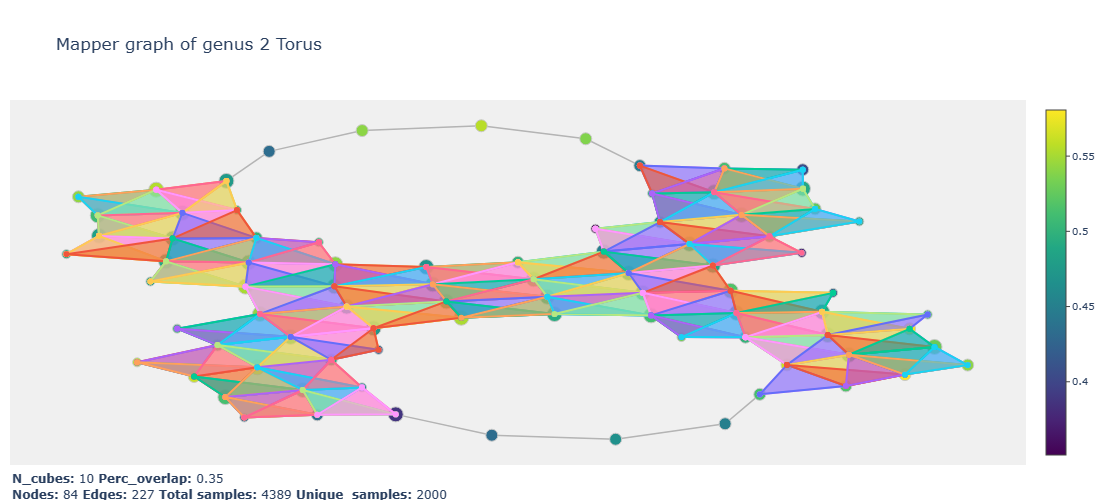

In [81]:
g_twodim = TwoMapper.graph_2Mapper(g_onedim, simplicial_complex2)
g_twodim.show()